In [1]:
#importing libraries
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [2]:
#source dataset path
path1 = r'D:\NSU\11th Semester\CSE445 - AZK\Project\Anime.csv'
path2 = r'D:\NSU\11th Semester\CSE445 - AZK\Project\profiles.csv'

In [3]:
#reading csv file
anime_data = pd.read_csv(path1)
anime_data.head()

,animeID,name,title_english,type,source,producers,genre,studio,episodes,score,scored_by,popularity,members,favorites,synopsis,premiered,related
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,['Bandai Visual'],"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",['Sunrise'],26.0,8.81,405664.0,39.0,795733.0,43460.0,"In the year 2071, humanity has colonized sever...",Spring 1998,"{'Adaptation': [{'mal_id': 173, 'type': 'manga..."
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Sunrise', 'Bandai Visual']","['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",['Bones'],1.0,8.41,120243.0,449.0,197791.0,776.0,"Another day, another bounty—such is the life o...",NaN,"{'Parent story': [{'mal_id': 1, 'type': 'anime..."
2,6,Trigun,Trigun,TV,Manga,['Victor Entertainment'],"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",['Madhouse'],26.0,8.30,212537.0,146.0,408548.0,10432.0,"Vash the Stampede is the man with a $$60,000,0...",Spring 1998,"{'Adaptation': [{'mal_id': 703, 'type': 'manga..."
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,['Bandai Visual'],"['Action', 'Magic', 'Police', 'Supernatural', ...",['Sunrise'],26.0,7.33,32837.0,1171.0,79397.0,537.0,Witches are individuals with special powers li...,Summer 2002,{}
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['TV Tokyo', 'Dentsu']","['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",['Toei Animation'],52.0,7.03,4894.0,3704.0,11708.0,14.0,It is the dark century and the people are suff...,Fall 2004,"{'Adaptation': [{'mal_id': 1348, 'type': 'mang..."


**Preparing Data

In [4]:
anime_data.columns

Index(['animeID', 'name', 'title_english', 'type', 'source', 'producers',
       'genre', 'studio', 'episodes', 'score', 'scored_by', 'popularity',
       'members', 'favorites', 'synopsis', 'premiered', 'related'],
      dtype='object')

In [5]:
#removing unnecessary Columns
del anime_data['producers']
del anime_data['studio']
del anime_data['popularity']
del anime_data['members']
del anime_data['favorites']
del anime_data['synopsis']
del anime_data['premiered']
del anime_data['related']

In [6]:
anime_data.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",26.0,8.81,405664.0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"['Action', 'Drama', 'Mystery', 'Sci-Fi', 'Space']",1.0,8.41,120243.0
2,6,Trigun,Trigun,TV,Manga,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...",26.0,8.30,212537.0
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"['Action', 'Magic', 'Police', 'Supernatural', ...",26.0,7.33,32837.0
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"['Adventure', 'Fantasy', 'Shounen', 'Supernatu...",52.0,7.03,4894.0


In [7]:
#removing completely blank cell
anime_data = anime_data[anime_data.name != '404']

In [8]:
#removing [,] and ' from genre
temp1 = anime_data['genre']

temp1 = temp1.str.replace('[','',regex=True)
temp1 = temp1.str.replace(']','',regex=True)
temp1 = temp1.str.replace("'",'',regex=True)

#updating genre
anime_data['genre'] = temp1
anime_data.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0
1,5,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0
2,6,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0


In [9]:
#checking if there is any unknown cell in type
anime_data[anime_data['type']=='Unknown'].head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by
8859,24023,Project758,NaN,Unknown,Unknown,Drama,NaN,NaN,0.0
9611,28613,Ginga Jinpuu Jinraiger,Galaxy Divine Wind Jinraiger,Unknown,Original,"Action, Adventure, Mecha",NaN,NaN,0.0
10339,30448,Mirai Arise,NaN,Unknown,Original,Sci-Fi,NaN,NaN,0.0
10344,30455,Kantai Collection: KanColle Zoku-hen,NaN,Unknown,Card game,"Action, Military, Sci-Fi, Slice of Life, School",NaN,NaN,0.0
11167,32455,Gekidol,NaN,Unknown,Unknown,Music,NaN,NaN,1.0


In [10]:
#removed unknown type animesource
anime_data = anime_data[anime_data.type != 'Unknown']

In [11]:
#checking if there is any unknown cell in source
anime_data[anime_data['source']=='Unknown'].head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by
60,88,Mobile Suit Gundam F91,Mobile Suit Gundam F91,Movie,Unknown,"Drama, Mecha, Military, Sci-Fi, Space",1.0,6.78,9833.0
78,108,Ou Dorobou Jing in Seventh Heaven,Jing: King of Bandits - Seventh Heaven,OVA,Unknown,"Adventure, Fantasy, Psychological, Comedy, Sho...",3.0,7.37,4665.0
140,176,Triangle Heart: Sweet Songs Forever,NaN,OVA,Unknown,"Adventure, Romance",4.0,6.24,2182.0
153,192,Love Hina Haru Special: Kimi Sakura Chiru Naka...,Love Hina Spring Movie,Special,Unknown,"Adventure, Comedy, Romance",1.0,7.27,27974.0
155,194,Macross Zero,Macross Zero,OVA,Unknown,"Adventure, Mecha, Military, Sci-Fi, Shounen",5.0,7.62,15264.0


In [12]:
#assuming unknow sources are original
anime_data.loc[anime_data['source']=='Unknown','source'] = 'Original'

In [13]:
#clearing cells with 0 scored by
anime_data.loc[anime_data['scored_by']==0,'scored_by'] = None
#anime_data[anime_data['scored_by']==0].head()

In [14]:
#checking all types for anime  
anime_data.type.unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music'], dtype=object)

In [15]:
#finding median of tv series episodes
tv = anime_data[anime_data['type'] == 'TV']
tv_median = tv['episodes'].median(skipna=True)
tv_median

24.0

In [16]:
#filling tv episodes null value with median
tv['episodes'].fillna(tv_median, inplace = True)

D:\Programs\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [17]:
#finding average tv rating and average scored by
tv_rating_avg = tv['score'].mean(skipna=True)
tv_scoredBy_avg = math.floor(tv['scored_by'].mean(skipna=True))

#filling empty tv rating and scored by with average
tv['score'].fillna(tv_rating_avg, inplace = True)
tv['scored_by'].fillna(tv_scoredBy_avg, inplace = True)

In [18]:
#merging these values in main anime_data
anime_data.update(tv)

In [19]:
#not needed anymore
#replacing any unknown cell in episode with 1
#anime_data['episodes'].fillna(1, inplace = True)
#anime_data[anime_data['episodes']==1].head()


In [20]:
tv.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by
0,1,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0
2,6,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0
3,7,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0
4,8,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0
5,16,Hachimitsu to Clover,Honey and Clover,TV,Manga,"Comedy, Drama, Josei, Romance, Slice of Life",24.0,8.12,57065.0


In [21]:
#Movies have 1 episode
movie = anime_data[anime_data['type'] == 'Movie']

#filling Movies episode null value with 1
movie['episodes'].fillna(1, inplace = True)

#finding average movie rating and average scored by
movie_rating_avg = movie['score'].mean(skipna=True)
movie_scoredBy_avg = math.floor(movie['scored_by'].mean(skipna=True))

#filling empty movie rating and scored by with average
movie['score'].fillna(movie_rating_avg, inplace = True)
movie['scored_by'].fillna(movie_scoredBy_avg, inplace = True)

#merging these values in main anime_data
anime_data.update(movie)

In [22]:
#finding median of OVA  episodes
ova = anime_data[anime_data['type'] == 'OVA']
ova_median = ova['episodes'].median(skipna=True)

#filling OVA episodes null value with median
ova['episodes'].fillna(ova_median, inplace = True)

#finding average OVA rating and average scored by
ova_rating_avg = ova['score'].mean(skipna=True)
ova_scoredBy_avg = math.floor(ova['scored_by'].mean(skipna=True))

#filling empty OVA rating and scored by with average
ova['score'].fillna(ova_rating_avg, inplace = True)
ova['scored_by'].fillna(ova_scoredBy_avg, inplace = True)

#merging these values in main anime_data
anime_data.update(ova)

In [23]:
#finding median of Special episodes
special = anime_data[anime_data['type'] == 'Special']
special_median = special['episodes'].median(skipna=True)

#filling Special episodes null value with median
special['episodes'].fillna(special_median, inplace = True)

#finding average Special rating and average scored by
special_rating_avg = special['score'].mean(skipna=True)
special_scoredBy_avg = math.floor(special['scored_by'].mean(skipna=True))

#filling empty Special rating and scored by with average
special['score'].fillna(special_rating_avg, inplace = True)
special['scored_by'].fillna(special_scoredBy_avg, inplace = True)

#merging these values in main anime_data
anime_data.update(special)

In [24]:
#finding median of ONA  episodes
ona = anime_data[anime_data['type'] == 'ONA']
ona_median = ona['episodes'].median(skipna=True)

#filling ONA null value with median
ona['episodes'].fillna(ona_median, inplace = True)

#finding average ONA rating and average scored by
ona_rating_avg = ona['score'].mean(skipna=True)
ona_scoredBy_avg = math.floor(ona['scored_by'].mean(skipna=True))

#filling empty ONA rating and scored by with average
ona['score'].fillna(ona_rating_avg, inplace = True)
ona['scored_by'].fillna(ona_scoredBy_avg, inplace = True)

#mergin these values in main anime_data
anime_data.update(ona)

In [25]:
#finding median of Music  episodes
music = anime_data[anime_data['type'] == 'Music']
music_median = ova['episodes'].median(skipna=True)

#filling Music null value with median
music['episodes'].fillna(music_median, inplace = True)

#finding average Music rating and average scored by
music_rating_avg = music['score'].mean(skipna=True)
music_scoredBy_avg = math.floor(music['scored_by'].mean(skipna=True))

#filling empty Music rating and scored by with average
music['score'].fillna(music_rating_avg, inplace = True)
music['scored_by'].fillna(music_scoredBy_avg, inplace = True)

#mergin these values in main anime_data
anime_data.update(music)

In [26]:
#checking if a Unknown values are replaced
episode = anime_data['episodes']
episode[15135]

2.0

In [27]:
#nan_rows = anime_data[anime_data.isnull().any(1)]
#nan_rows.head(50)
#anime_data.isnull().sum()

finding weighted rating

In [28]:
#finding mean rating across the whole anime_data
mean_animeRating = anime_data['score'].mean()

In [29]:
#funtion to find weighted reating
def W_R(a, C=mean_animeRating):
    v = a['scored_by']
    R = a['score']
    return (v/(v+1) * R) + (1/(1+v) * C)

In [30]:
#new column with weighted rating
anime_data['rating'] = anime_data.apply(W_R, axis=1)
#anime_data.head()

In [31]:
#anime_data.to_csv(r'D:\NSU\11th Semester\CSE445 - AZK\Project\test1.csv', index=False, mode= 'w')

In [32]:
anime_data.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848


User Data file

In [33]:
#reading user data csv
user_data = pd.read_csv(path2)

In [34]:
user_data.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,02-Oct-94,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,10-Nov-00,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,NaN,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep-05,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,30-Oct-99,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [35]:
#replacing empty cells as unknown gender
user_data['gender'].fillna('unknown', inplace = True)
user_data.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,02-Oct-94,"['33352', '25013', '5530', '33674', '1482', '2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,10-Nov-00,"['11061', '31964', '853', '20583', '918', '925...",https://myanimelist.net/profile/baekbeans
2,skrn,unknown,NaN,"['918', '2904', '11741', '17074', '23273', '32...",https://myanimelist.net/profile/skrn
3,edgewalker00,Male,Sep-05,"['5680', '849', '2904', '3588', '37349']",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,30-Oct-99,"['4181', '7791', '9617', '5680', '2167', '4382...",https://myanimelist.net/profile/aManOfCulture99


In [36]:
#removed unknown type gender
user_data = user_data[user_data.gender != 'unknown']

In [37]:
len(user_data)

53856

In [38]:
#replacing [,] and ' from the favourites anime
temp = user_data['favorites_anime']

temp = temp.str.replace('[','',regex=True)
temp = temp.str.replace(']','',regex=True)
temp = temp.str.replace("'",'',regex=True)
temp.head()

0    33352, 25013, 5530, 33674, 1482, 269, 18245, 2...
1    11061, 31964, 853, 20583, 918, 9253, 34599, 35...
3                         5680, 849, 2904, 3588, 37349
4    4181, 7791, 9617, 5680, 2167, 4382, 849, 235, ...
7    11061, 30, 6594, 28701, 10087, 6746, 918, 1535...
Name: favorites_anime, dtype: object

In [39]:
#updating favourites anime
user_data['favorites_anime'] = temp
user_data.head()

,profile,gender,birthday,favorites_anime,link
0,DesolatePsyche,Male,02-Oct-94,"33352, 25013, 5530, 33674, 1482, 269, 18245, 2...",https://myanimelist.net/profile/DesolatePsyche
1,baekbeans,Female,10-Nov-00,"11061, 31964, 853, 20583, 918, 9253, 34599, 35...",https://myanimelist.net/profile/baekbeans
3,edgewalker00,Male,Sep-05,"5680, 849, 2904, 3588, 37349",https://myanimelist.net/profile/edgewalker00
4,aManOfCulture99,Male,30-Oct-99,"4181, 7791, 9617, 5680, 2167, 4382, 849, 235, ...",https://myanimelist.net/profile/aManOfCulture99
7,NIGGER_BONER,Male,01-Jan-85,"11061, 30, 6594, 28701, 10087, 6746, 918, 1535...",https://myanimelist.net/profile/NIGGER_BONER


In [40]:
#separating favourite anime genderwise
male_fav=user_data[user_data['gender']=='Male']
female_fav=user_data[user_data['gender']=='Female']
#male_fav.head()

In [41]:
#counting female fans of anime id wise
f_data = female_fav.favorites_anime.str.get_dummies(sep=', ').sum()

In [42]:
f_data

1        597
100       27
1000       6
10012     12
10015      4
        ... 
9981       3
9982       5
9989     333
9996       2
9999       2
Length: 2633, dtype: int64

In [43]:
#counting male fans of anime id wise
m_data = male_fav.favorites_anime.str.get_dummies(sep=', ').sum()

In [44]:
#creating a dataframe with anime id and female fan number
temp_1 = pd.DataFrame({'animeID': f_data.index, 'female_fan': f_data})
#df = pd.DataFrame({'female_fan': f_data})
temp_1.reset_index(drop=True, inplace=True)
temp_1.head()

,animeID,female_fan
0,1,597
1,100,27
2,1000,6
3,10012,12
4,10015,4


In [45]:
#creating another dataframe with anime id and male fan number
temp_2 = pd.DataFrame({'animeID': m_data.index, 'male_fan': m_data})
temp_2.reset_index(drop=True, inplace=True)
temp_2.head()

,animeID,male_fan
0,1,2922
1,100,1
2,1000,23
3,10012,67
4,10015,2


In [46]:
#merging two dataframe based on anime id
#temp_3 =  pd.DataFrame.merge(temp_2,temp_1,on='animeID')
temp_3 = temp_2.merge(temp_1,how='left', left_on='animeID', right_on='animeID')
temp_3.head()

,animeID,male_fan,female_fan
0,1,2922,597.0
1,100,1,27.0
2,1000,23,6.0
3,10012,67,12.0
4,10015,2,4.0


In [47]:
#temp_3.to_csv(r'D:\NSU\11th Semester\CSE445 - AZK\Project\user_data.csv')

In [48]:
#converting anime id from str to numeric
temp_3["animeID"] = pd.to_numeric(temp_3["animeID"])

In [49]:
#creating a new dataframe combining anime data and user data
#df =  pd.DataFrame.merge(anime_data,temp_3,on='animeID')
df = anime_data.merge(temp_3,how='left', left_on='animeID', right_on='animeID')
df.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating,male_fan,female_fan
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994,2922.0,597.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982,36.0,11.0
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991,609.0,179.0
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968,18.0,24.0
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848,NaN,NaN


In [50]:
#filling empty cells with 0
df['male_fan'].fillna(0, inplace=True)
df['female_fan'].fillna(0, inplace=True)

In [51]:
#funtion to calculate fanbase gender biasness
def Fan(a):
    x = a['male_fan']
    y = a['female_fan']
    return (x-y)

In [52]:
#new column with fan base
df['fan_base'] = df.apply(Fan, axis=1)

In [53]:
df.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating,male_fan,female_fan,fan_base
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994,2922.0,597.0,2325.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982,36.0,11.0,25.0
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991,609.0,179.0,430.0
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968,18.0,24.0,-6.0
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848,0.0,0.0,0.0


In [54]:
#saving dataframe to csv file
df.to_csv(r'D:\NSU\11th Semester\CSE445 - AZK\Project\anime_data.csv')

In [55]:
#converting feature to categorical values
temp_type = pd.get_dummies(df['type'])
temp_source = pd.get_dummies(df['source'])
temp_genre = df['genre'].str.get_dummies(sep=', ')

#temp_type.head()

In [140]:
#taking the features into a dataframe
anime = pd.concat([temp_type,temp_source,temp_genre,df['episodes'],df['rating'],df['fan_base']], axis=1)
gr = anime

In [161]:
anime.head()

,Movie,Music,ONA,OVA,Special,TV,4-koma manga,Book,Card game,Digital manga,...,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,episodes,rating,fan_base
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,26.0,8.809994,2325.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,8.409982,25.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,26.0,8.299991,430.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,26.0,7.329968,-6.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,52.0,7.029848,0.0


In [162]:
#Scaling the values
scaler = MinMaxScaler()
anime = scaler.fit_transform(anime)
np.round(anime,2)

array([[0.  , 0.  , 0.  , ..., 0.01, 0.94, 0.58],
       [1.  , 0.  , 0.  , ..., 0.  , 0.89, 0.18],
       [0.  , 0.  , 0.  , ..., 0.01, 0.87, 0.25],
       ...,
       [0.  , 0.  , 1.  , ..., 0.  , 0.52, 0.17],
       [0.  , 0.  , 0.  , ..., 0.01, 0.66, 0.18],
       [0.  , 0.  , 0.  , ..., 0.01, 0.66, 0.17]])

In [59]:
#clustering using KNN
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(anime)
distances, indices = nbrs.kneighbors(anime)

In [175]:
#funtion to get recommendation
def get_recommendation(name):
    rec_id=df.index[df['name']==name].tolist()[0]
    recommend = pd.DataFrame(columns = ['Recommended Anime', 'English Title', 'Type', 'Rating', 'Genre'])
    for id in indices[rec_id][1:]:
        new_row = {'Recommended Anime':df.iloc[id]['name'], 'English Title':df.iloc[id]['title_english'], 'Type':df.iloc[id]['type'], 'Rating':np.round(df.iloc[id]['rating'],2), 'Genre':df.iloc[id]['genre'] }
        recommend = recommend.append(new_row, ignore_index=True)
    print("Anime Recommendation for:", name, '/',df.iloc[rec_id]['title_english'])
    display(recommend)

In [177]:
get_recommendation('Cowboy Bebop')

Anime Recommendation for: Cowboy Bebop / Cowboy Bebop


,Recommended Anime,English Title,Type,Rating,Genre
0,Ginga Tetsudou Monogatari,The Galaxy Railways,TV,7.25,"Action, Adventure, Space, Drama, Sci-Fi"
1,Ginga Tetsudou Monogatari: Eien e no Bunkiten,NaN,TV,6.98,"Action, Adventure, Space, Drama, Sci-Fi"
2,Seihou Tenshi Angel Links,Angel Links,TV,6.02,"Action, Adventure, Space, Comedy, Romance, Dra..."
3,Uchuu Patrol Luluco,Space Patrol Luluco,TV,7.68,"Action, Adventure, Comedy, Space"
4,Uchuu Senkan Yamato,Star Blazers: The Quest for Iscandar,TV,7.67,"Action, Adventure, Drama, Military, Sci-Fi, Space"
5,Uchuu Senkan Yamato 2,Star Blazers: The Comet Empire,TV,7.55,"Action, Military, Sci-Fi, Adventure, Space, Drama"
6,Cowboy Bebop: Yose Atsume Blues,Cowboy Bebop Session XX,Special,7.49,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
7,Uchuu Senkan Yamato III,Star Blazers: The Bolar Wars,TV,7.21,"Action, Military, Sci-Fi, Adventure, Space, Drama"
8,Uchuu Densetsu Ulysses 31,Ulysses 31,TV,7.15,"Action, Adventure, Sci-Fi, Space"
9,Iron Kid,Eon Kid,TV,7.06,"Action, Adventure, Comedy, Sci-Fi"


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

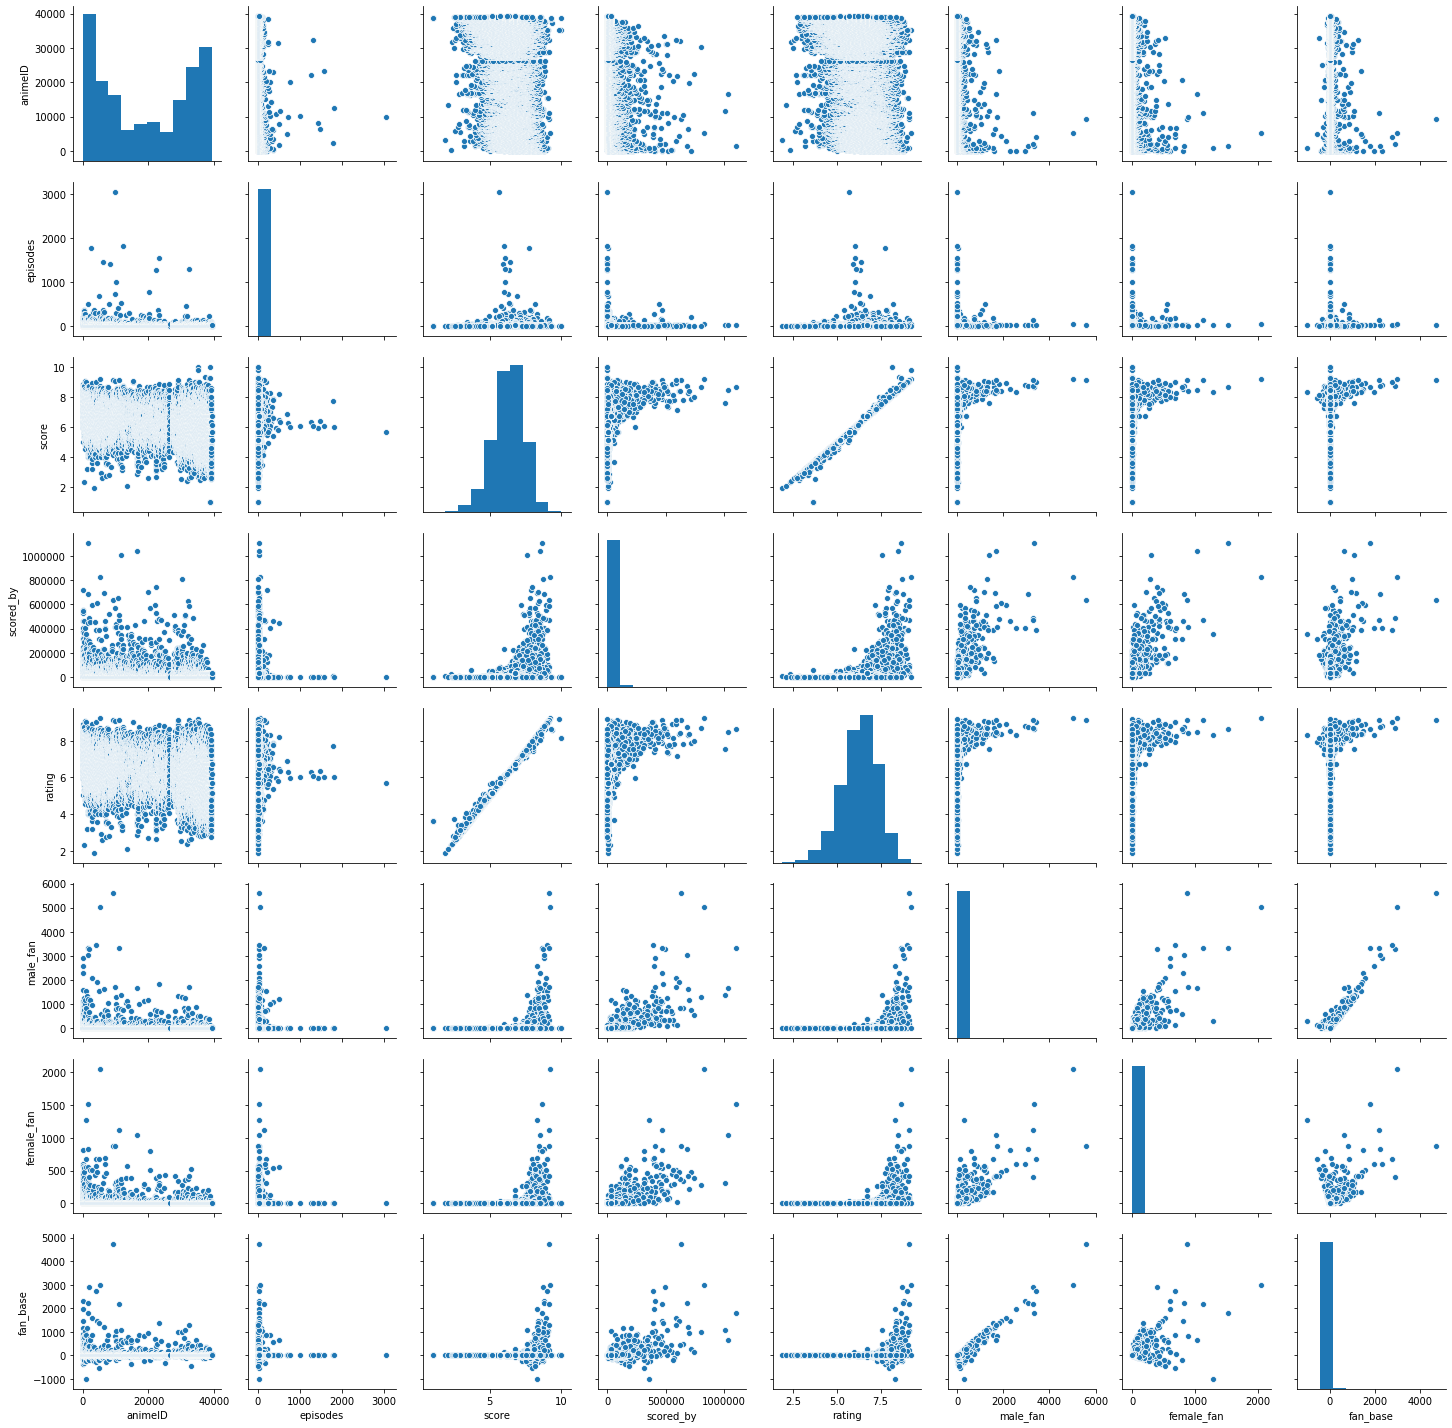

In [63]:
sns.pairplot(df)

In [64]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [65]:
label = df.columns

In [66]:
#metrics.silhouette_score(distances, metric='euclidean')

In [67]:
type(distances)

numpy.ndarray

In [68]:
distances


array([[0.        , 1.10067573, 1.1081936 , ..., 1.48775968, 1.4888789 ,
        1.49088906],
       [0.        , 1.41606606, 1.41810946, ..., 1.73339718, 1.73379833,
        1.73583847],
       [0.        , 1.02350008, 1.41505862, ..., 1.41959297, 1.42004394,
        1.42458143],
       ...,
       [0.        , 0.01946333, 1.00000025, ..., 1.00009917, 1.00010261,
        1.00017724],
       [0.        , 1.0000399 , 1.00117049, ..., 1.41618116, 1.41685002,
        1.42146932],
       [0.        , 0.23137357, 1.00000025, ..., 1.41422498, 1.41423112,
        1.41424314]])

In [69]:
type(anime)

numpy.ndarray

In [70]:
test1 = pd.DataFrame(anime)

In [71]:
type(test1)

pandas.core.frame.DataFrame

In [72]:
nbrs1 = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(test1)
distances1, indices1 = nbrs1.kneighbors(test1)

In [73]:
distances2 = pairwise_distances(distances1)

In [74]:
distances1

array([[0.        , 1.10067573, 1.1081936 , ..., 1.48775968, 1.4888789 ,
        1.49088906],
       [0.        , 1.41606606, 1.41810946, ..., 1.73339718, 1.73379833,
        1.73583847],
       [0.        , 1.02350008, 1.41505862, ..., 1.41959297, 1.42004394,
        1.42458143],
       ...,
       [0.        , 0.01946333, 1.00000025, ..., 1.00009917, 1.00010261,
        1.00017724],
       [0.        , 1.0000399 , 1.00117049, ..., 1.41618116, 1.41685002,
        1.42146932],
       [0.        , 0.23137357, 1.00000025, ..., 1.41422498, 1.41423112,
        1.41424314]])

In [75]:
type(distances1)

numpy.ndarray

In [76]:
from matplotlib import pyplot as plt 

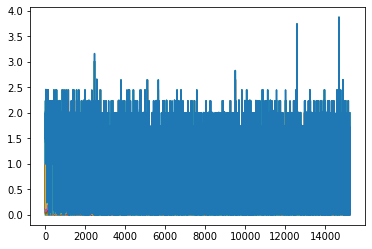

In [77]:
plt.plot(distances1)

In [78]:
from sklearn.metrics import silhouette_score

In [79]:
#distances1.labels_

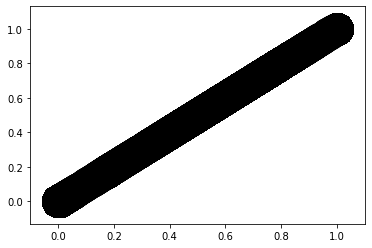

In [80]:
plt.scatter(test1, test1, marker = 'o', s = 1000, color = 'black')

In [81]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters=20,verbose=1).fit(test1)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 40032.757958532755
start iteration
done sorting
end inner loop
Iteration 1, inertia 37273.13036112121
start iteration
done sorting
end inner loop
Iteration 2, inertia 36685.798159887796
start iteration
done sorting
end inner loop
Iteration 3, inertia 36448.01192272393
start iteration
done sorting
end inner loop
Iteration 4, inertia 36343.80672135794
start iteration
done sorting
end inner loop
Iteration 5, inertia 36297.834444115484
start iteration
done sorting
end inner loop
Iteration 6, inertia 36268.026145771575
start iteration
done sorting
end inner loop
Iteration 7, inertia 36250.89671958374
start iteration
done sorting
end inner loop
Iteration 8, inertia 36232.5134746744
start iteration
done sorting
end inner loop
Iteration 9, inertia 36218.58357946104
start iteration
done sorting
end inner loop
Iteration 10, inertia 36213.4127164031
start iteration
done sorting
end inner loop
Iteration 11, in

Iteration 27, inertia 35875.320568246156
start iteration
done sorting
end inner loop
Iteration 28, inertia 35874.00747691485
start iteration
done sorting
end inner loop
Iteration 29, inertia 35871.95213746255
start iteration
done sorting
end inner loop
Iteration 30, inertia 35868.89600406314
start iteration
done sorting
end inner loop
Iteration 31, inertia 35865.378114188294
start iteration
done sorting
end inner loop
Iteration 32, inertia 35860.53737451874
start iteration
done sorting
end inner loop
Iteration 33, inertia 35853.849102690096
start iteration
done sorting
end inner loop
Iteration 34, inertia 35846.14292007774
start iteration
done sorting
end inner loop
Iteration 35, inertia 35840.56420281937
start iteration
done sorting
end inner loop
Iteration 36, inertia 35836.42597626012
start iteration
done sorting
end inner loop
Iteration 37, inertia 35834.581312070004
start iteration
done sorting
end inner loop
Iteration 38, inertia 35833.072692648966
start iteration
done sorting
en

Iteration 48, inertia 35955.584198173216
start iteration
done sorting
end inner loop
Iteration 49, inertia 35954.5809190707
start iteration
done sorting
end inner loop
Iteration 50, inertia 35953.16370452487
start iteration
done sorting
end inner loop
Iteration 51, inertia 35952.40008428204
start iteration
done sorting
end inner loop
Iteration 52, inertia 35952.04434104991
start iteration
done sorting
end inner loop
Iteration 53, inertia 35951.8171792741
start iteration
done sorting
end inner loop
Iteration 54, inertia 35951.695894844335
start iteration
done sorting
end inner loop
Iteration 55, inertia 35951.437884836705
start iteration
done sorting
end inner loop
Iteration 56, inertia 35950.527224872094
start iteration
done sorting
end inner loop
Iteration 57, inertia 35949.79829603803
start iteration
done sorting
end inner loop
Iteration 58, inertia 35949.66155762592
start iteration
done sorting
end inner loop
Iteration 59, inertia 35949.64640902322
start iteration
done sorting
end i

Iteration 14, inertia 36117.31863656585
start iteration
done sorting
end inner loop
Iteration 15, inertia 36082.452552396244
start iteration
done sorting
end inner loop
Iteration 16, inertia 36073.734371432845
start iteration
done sorting
end inner loop
Iteration 17, inertia 36072.4601561131
start iteration
done sorting
end inner loop
Iteration 18, inertia 36072.03497186843
start iteration
done sorting
end inner loop
Iteration 19, inertia 36071.87671192254
start iteration
done sorting
end inner loop
Iteration 20, inertia 36071.73535753225
start iteration
done sorting
end inner loop
Iteration 21, inertia 36071.6525348616
start iteration
done sorting
end inner loop
Iteration 22, inertia 36071.57551482507
start iteration
done sorting
end inner loop
Iteration 23, inertia 36071.55375259113
start iteration
done sorting
end inner loop
Iteration 24, inertia 36071.55375259113
center shift 0.000000e+00 within tolerance 5.896645e-06
Initialization complete
start iteration
done sorting
end inner l

In [83]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [84]:
#kmeans.cluster_centers_

In [85]:
labels =kmeans.labels_

In [86]:
metrics.silhouette_score(test1, kmeans.labels_, metric='euclidean')

0.12710804549362814

In [87]:
labels

array([11, 14,  5, ...,  1,  5,  5])

In [88]:
test2 = df

In [89]:
test2['label'] = labels

In [90]:
test2.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating,male_fan,female_fan,fan_base,label
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994,2922.0,597.0,2325.0,11
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982,36.0,11.0,25.0,14
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991,609.0,179.0,430.0,5
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968,18.0,24.0,-6.0,15
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848,0.0,0.0,0.0,5


In [91]:
test2['label'].isnull().sum()

0

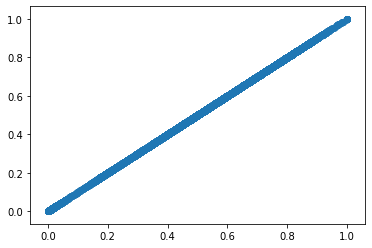

In [92]:
plt.scatter(test1,test1, cmap='rainbow')

In [93]:
from sklearn.metrics import pairwise_distances_argmin_min

In [94]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, test1)

In [95]:
closest

array([ 8945, 11228,  4178, 10387,  2105, 13986,  4158,  6807,  3095,
        7196,  5587,  3878, 13028, 11657, 10358, 12152,  7714, 15140,
       10522,  4654], dtype=int64)

In [96]:
t = kmeans.cluster_centers_

In [97]:
len(t)

20

In [98]:
test2['label'].unique()

array([11, 14,  5, 15,  9,  3, 13, 10,  6,  2, 19, 12,  8, 18, 16,  4, 17,
        1,  7,  0], dtype=int64)

In [99]:
kmeans.inertia_

35727.12447759009

Text(0, 0.5, 'Inertia')

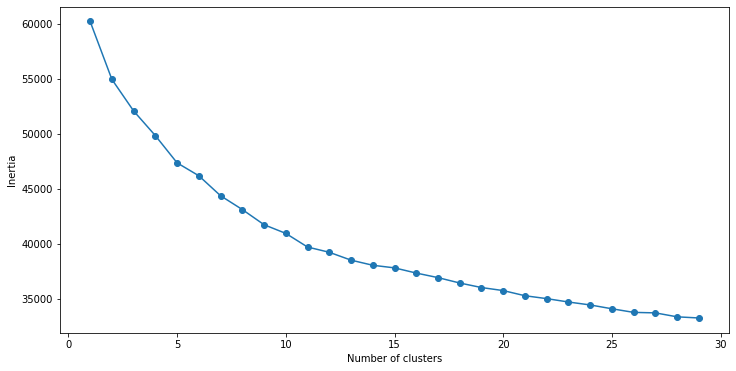

In [100]:
SSE = []
for cluster in range(1,30):
    kmeans1 = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans1.fit(test1)
    SSE.append(kmeans1.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [101]:
labels

array([11, 14,  5, ...,  1,  5,  5])

In [102]:
metrics.calinski_harabasz_score(test1, labels)

548.6792721498373

In [103]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(test1, labels)

2.461121446102271

In [104]:
nbrs.effective_metric_params_

{}

In [105]:
nbrs.get_params(deep=False)

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 11,
 'p': 2,
 'radius': 1.0}

In [106]:
indices

array([[    0,  1270,  2354, ...,  1416,  2001,  8136],
       [    1,  8657,  1895, ...,  1957,  2396,  7557],
       [    2,  2716, 10959, ...,   893,    13,  2382],
       ...,
       [15235, 14797, 11071, ...,  9620, 13669, 12953],
       [15236, 14853,  1123, ...,  5627,  4590,  2111],
       [15237, 14052, 15103, ...,   959,  8531,  3831]], dtype=int64)

In [107]:
len(indices)

15238

In [108]:
len(labels)

15238

In [109]:
metrics.calinski_harabasz_score(anime, labels)

548.6792721498373

In [110]:
indices1

array([[    0,  1270,  2354, ...,  1416,  2001,  8136],
       [    1,  8657,  1895, ...,  1957,  2396,  7557],
       [    2,  2716, 10959, ...,   893,    13,  2382],
       ...,
       [15235, 14797, 11071, ...,  9620, 13669, 12953],
       [15236, 14853,  1123, ...,  5627,  4590,  2111],
       [15237, 14052, 15103, ...,   959,  8531,  3831]], dtype=int64)

In [111]:
len(indices1)

15238

In [112]:
labels

array([11, 14,  5, ...,  1,  5,  5])

In [113]:
kmeans1.inertia_

33238.529389527546

In [114]:
labels1=kmeans1.labels_
labels1

array([16,  2,  6, ..., 21, 27,  4])

In [115]:
#funtion to get recommendation
def get_recommendation2(name):
    rec_id=df.index[df['name']==name].tolist()[0]
    recommend = pd.DataFrame(columns = ['Recommended Anime', 'English Title', 'Type', 'Rating', 'Genre'])
    for id in labels1[rec_id][1:]:
        new_row = {'Recommended Anime':df.iloc[id]['name'], 'English Title':df.iloc[id]['title_english'], 'Type':df.iloc[id]['type'], 'Rating':np.round(df.iloc[id]['rating'],2), 'Genre':df.iloc[id]['genre'] }
        recommend = recommend.append(new_row, ignore_index=True)
    print("Anime Recommendation for:", name, '/',df.iloc[rec_id]['title_english'])
    display(recommend)

In [116]:
#get_recommendation2('Nurarihyon no Mago')

IndexError: invalid index to scalar variable.

In [117]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [118]:
testlabel=column(indices1,0)

In [119]:
metrics.silhouette_score(anime, testlabel, metric='euclidean')

0.011287568551559157

In [120]:
type(indices1)

numpy.ndarray

In [121]:
type(labels1)

numpy.ndarray

In [122]:
indices1

array([[    0,  1270,  2354, ...,  1416,  2001,  8136],
       [    1,  8657,  1895, ...,  1957,  2396,  7557],
       [    2,  2716, 10959, ...,   893,    13,  2382],
       ...,
       [15235, 14797, 11071, ...,  9620, 13669, 12953],
       [15236, 14853,  1123, ...,  5627,  4590,  2111],
       [15237, 14052, 15103, ...,   959,  8531,  3831]], dtype=int64)

In [123]:
labels1

array([16,  2,  6, ..., 21, 27,  4])

In [124]:
d = kmeans1.transform(test1)[:, j]

NameError: name 'j' is not defined

In [129]:
from sklearn.decomposition import PCA

In [130]:
pca2=PCA(2)

In [131]:
kmeans3 = KMeans(n_clusters=20).fit(test1)

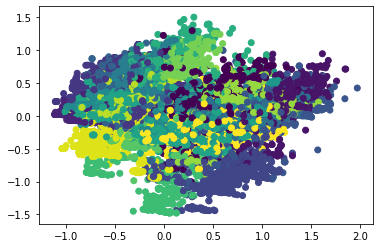

In [132]:
plot_columns=pca2.fit_transform(test1)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1], c=kmeans3.labels_)
plt.show()

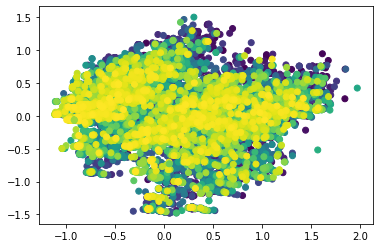

In [133]:
plot_columns=pca2.fit_transform(test1)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1], c=testlabel)
plt.show()

In [134]:
#anime.plot(kind='bar',x=[;,0],y=[:,1])

SyntaxError: invalid syntax (<ipython-input-134-f883a09f3fb5>, line 1)

In [135]:
#test1['TV'].count()

In [136]:
type(anime)

numpy.ndarray

In [137]:
type(anime_data)

pandas.core.frame.DataFrame

In [138]:
type(test1)

pandas.core.frame.DataFrame

In [142]:
gr.sum(axis = 0, skipna = True)

Movie         2760.00000
Music         1020.00000
ONA           1377.00000
OVA           3627.00000
Special       2052.00000
                ...     
Yaoi            37.00000
Yuri            39.00000
episodes    179287.00000
rating       95928.80493
fan_base    124564.00000
Length: 67, dtype: float64

In [141]:
gr.head()

,Movie,Music,ONA,OVA,Special,TV,4-koma manga,Book,Card game,Digital manga,...,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,episodes,rating,fan_base
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,26.0,8.809994,2325.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,8.409982,25.0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,26.0,8.299991,430.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,26.0,7.329968,-6.0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,52.0,7.029848,0.0


In [ ]:
anime.plot(kind='bar',x=[;,0],y=[:,1])

In [143]:
type(gr.sum(axis = 0, skipna = True))

pandas.core.series.Series

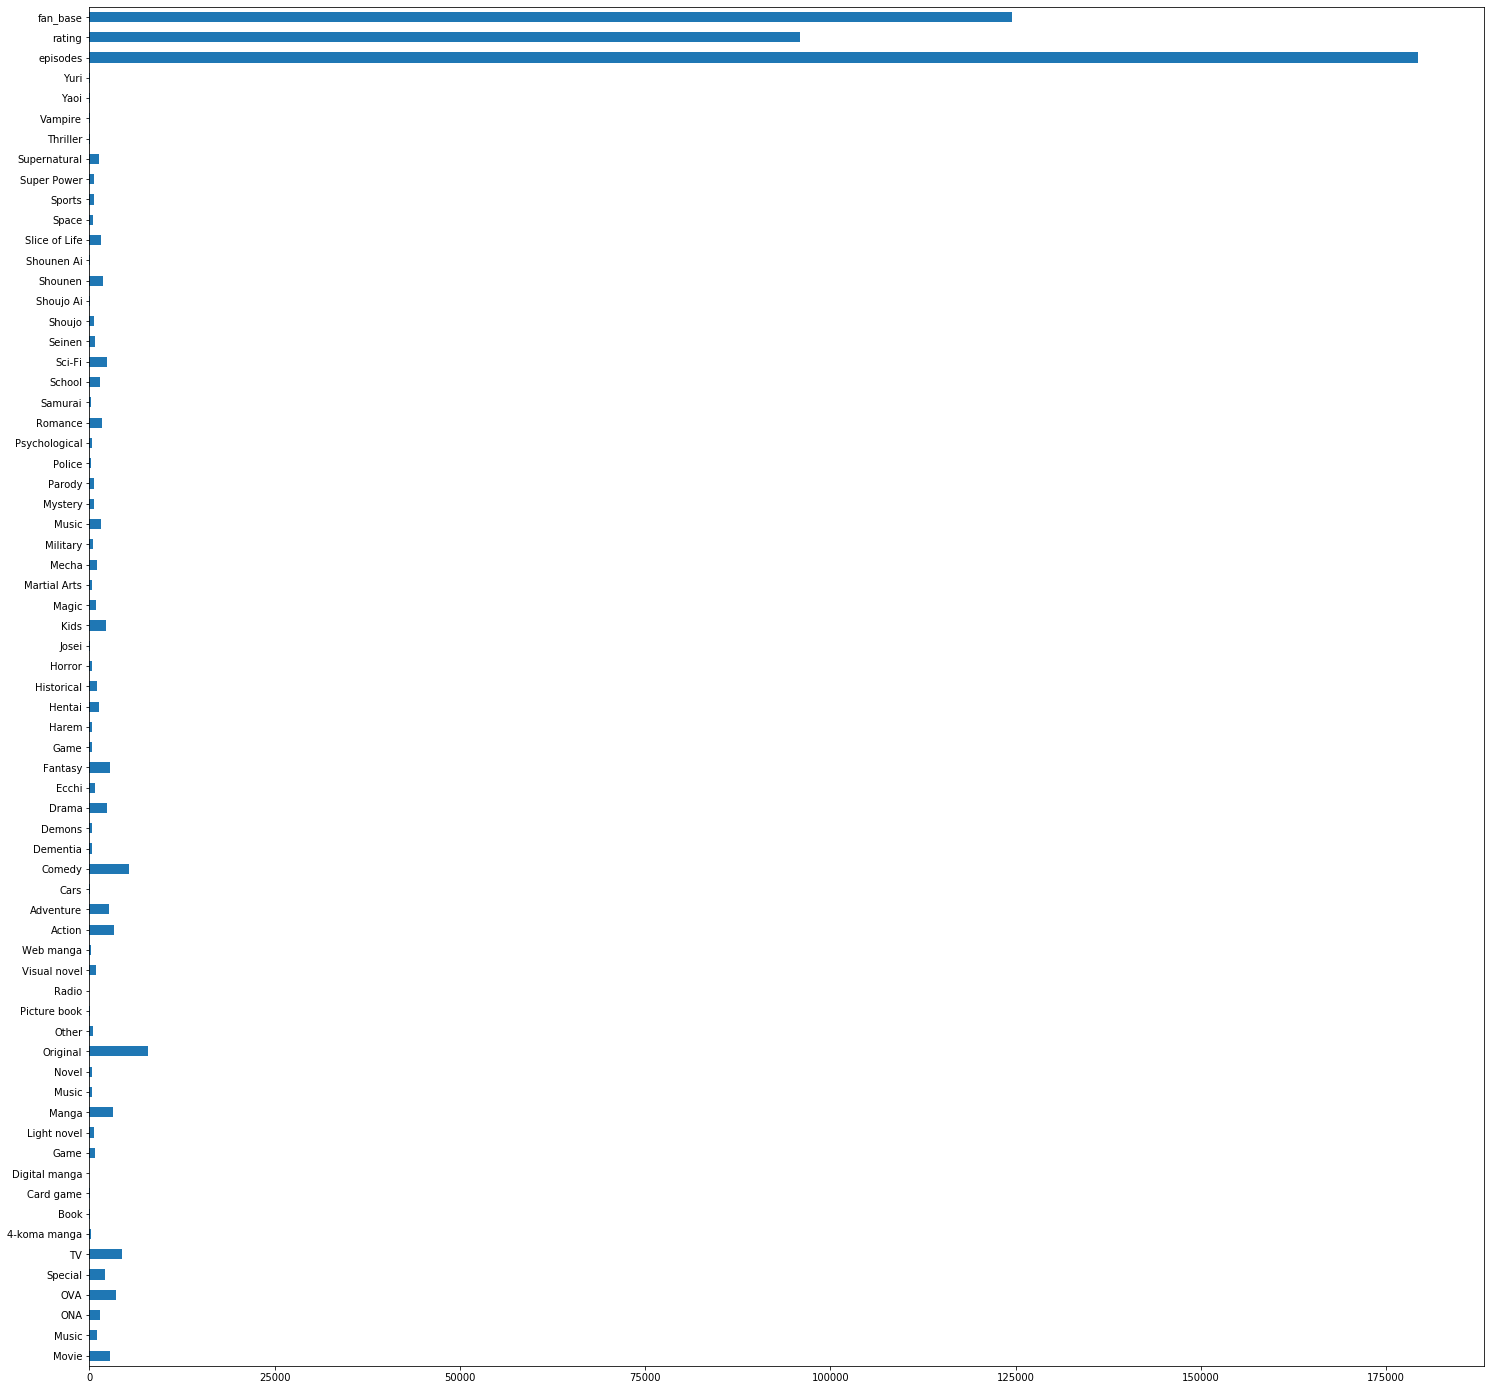

In [167]:
gr.sum(axis = 0, skipna = True).plot(kind='barh', figsize=(25,25))

In [169]:
anime_data.head(10)

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848
5,16.0,Hachimitsu to Clover,Honey and Clover,TV,Manga,"Comedy, Drama, Josei, Romance, Slice of Life",24.0,8.12,57065.0,8.119968
6,17.0,Hungry Heart: Wild Striker,NaN,TV,Manga,"Slice of Life, Comedy, Sports, Shounen",52.0,7.67,9307.0,7.669851
7,18.0,Initial D Fourth Stage,NaN,TV,Manga,"Action, Cars, Sports, Drama, Seinen",24.0,8.23,42555.0,8.229954
8,19.0,Monster,Monster,TV,Manga,"Drama, Horror, Mystery, Police, Psychological,...",74.0,8.69,131233.0,8.689982
9,20.0,Naruto,Naruto,TV,Manga,"Action, Adventure, Comedy, Super Power, Martia...",220.0,7.90,716412.0,7.899998


In [172]:
del df['label']

In [173]:
df.head()

,animeID,name,title_english,type,source,genre,episodes,score,scored_by,rating,male_fan,female_fan,fan_base
0,1.0,Cowboy Bebop,Cowboy Bebop,TV,Original,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26.0,8.81,405664.0,8.809994,2922.0,597.0,2325.0
1,5.0,Cowboy Bebop: Tengoku no Tobira,Cowboy Bebop: The Movie,Movie,Original,"Action, Drama, Mystery, Sci-Fi, Space",1.0,8.41,120243.0,8.409982,36.0,11.0,25.0
2,6.0,Trigun,Trigun,TV,Manga,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26.0,8.30,212537.0,8.299991,609.0,179.0,430.0
3,7.0,Witch Hunter Robin,Witch Hunter Robin,TV,Original,"Action, Magic, Police, Supernatural, Drama, My...",26.0,7.33,32837.0,7.329968,18.0,24.0,-6.0
4,8.0,Bouken Ou Beet,Beet the Vandel Buster,TV,Manga,"Adventure, Fantasy, Shounen, Supernatural",52.0,7.03,4894.0,7.029848,0.0,0.0,0.0


*Presentation*

In [201]:
#k means inertia graph
from IPython.display import clear_output

In [202]:
SSE = []
kmeSscore = []
kmeanCHscore = []
kmeanDBscore = []
#metrics.silhouette_score(test1, kmeans.labels_, metric='euclidean')
#metrics.calinski_harabasz_score(anime, labels)

In [203]:
for cluster in range(2,25):
    clear_output(wait=True)
    kmeans5 = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans5.fit(test1)
    SSE.append(kmeans5.inertia_)
    kmeSscore.append(metrics.silhouette_score(test1,kmeans5.labels_, metric='euclidean'))
    kmeanCHscore.append(metrics.calinski_harabasz_score(test1, kmeans5.labels_))
    kmeanDBscore.append(davies_bouldin_score(test1, kmeans5.labels_))
    print("Current Progress:",np.round(cluster/25 *100, 2),"%")

Current Progress: 96.0 %


Text(0, 0.5, 'Inertia')

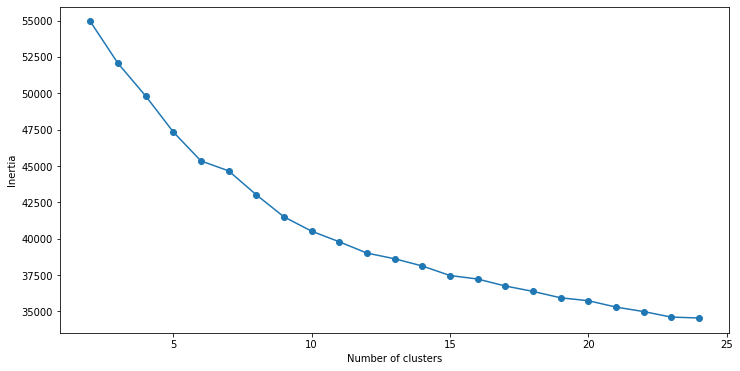

In [204]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(2,25), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [205]:
kmeSscore

[0.09741299352969034,
 0.08714107675892878,
 0.08952647195182567,
 0.11302735798171824,
 0.11782330710983592,
 0.12043862113486173,
 0.12188518146670899,
 0.13558168873107768,
 0.13428039202901731,
 0.13721071364388954,
 0.14094162828366097,
 0.14271765043544496,
 0.1392875775180086,
 0.1389298113032144,
 0.13389060562106167,
 0.13659836209491666,
 0.12776911246906913,
 0.13512436324490415,
 0.1292532114043313,
 0.1333363115682734,
 0.1361541187811996,
 0.13229335410178858,
 0.1311451141426262]

In [206]:
kmeanCHscore

[1459.7705580193247,
 1190.4427919004436,
 1058.1996571418078,
 1034.3291874420772,
 997.7272100181149,
 882.7864965655316,
 868.8146347536584,
 857.5637536492468,
 821.7931738953002,
 781.1221856915028,
 751.7323453174829,
 708.8174253702398,
 678.0534561362825,
 659.5813562017812,
 626.1520566316315,
 607.0452760632717,
 586.2620803610622,
 570.8360417964175,
 548.182062915637,
 536.6959464114938,
 521.9883270912193,
 511.30390977729013,
 491.0323810814991]

In [207]:
type(kmeanCHscore)

list

In [208]:
#compare =  pd.DataFrame(list(zip(kmeSscore, kmeanCHscore)),columns =[' Silhouette Coefficient', 'C-H Score']) 

In [217]:
keS = kmeSscore
keS

[0.09741299352969034,
 0.08714107675892878,
 0.08952647195182567,
 0.11302735798171824,
 0.11782330710983592,
 0.12043862113486173,
 0.12188518146670899,
 0.13558168873107768,
 0.13428039202901731,
 0.13721071364388954,
 0.14094162828366097,
 0.14271765043544496,
 0.1392875775180086,
 0.1389298113032144,
 0.13389060562106167,
 0.13659836209491666,
 0.12776911246906913,
 0.13512436324490415,
 0.1292532114043313,
 0.1333363115682734,
 0.1361541187811996,
 0.13229335410178858,
 0.1311451141426262]

In [210]:
keC = kmeanCHscore

In [211]:
keD = kmeanDBscore

In [212]:
#KNN

In [213]:
knnSscore = []
knnCHscore = []
knnDBscore = []

In [214]:
for cluster in range(2,25):
    clear_output(wait=True)
    nbrs5 = NearestNeighbors(n_neighbors= cluster, algorithm='ball_tree').fit(test1)
    distances5, indices5 = nbrs5.kneighbors(test1)
    labels5 = column(indices5,0)
    knnSscore.append(metrics.silhouette_score(test1, labels5, metric='euclidean'))
    knnCHscore.append(metrics.calinski_harabasz_score(test1, labels5))
    knnDBscore.append(davies_bouldin_score(test1, labels5))
    print("Current Progress:",np.round(cluster/25 *100, 2),"%")

Current Progress: 96.0 %


In [215]:
knS = knnSscore
knC = knnCHscore
knD = knnDBscore

In [219]:
clu = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
dict = { 'Cluster Number': clu, 'k-means Silhouette Coefficient': keS, 'k-means Calinski-Harabasz Index': keC, 'k-means Davies-Bouldin': keD, 'KNN Silhouette Coefficient': knS, 'KNN Calinski-Harabasz Index': knC, 'KNN Davies-Bouldin': knD}
compare = pd.DataFrame(dict)

In [ ]:
#davies_bouldin_score(test1, labels5)

In [220]:
compare.head(25)

,Cluster Number,k-means Silhouette Coefficient,k-means Calinski-Harabasz Index,k-means Davies-Bouldin,KNN Silhouette Coefficient,KNN Calinski-Harabasz Index,KNN Davies-Bouldin
0,2,0.097413,1459.770558,3.185488,0.011288,3.662640e+32,0.000245
1,3,0.087141,1190.442792,2.927110,0.011288,3.662640e+32,0.000245
2,4,0.089526,1058.199657,2.732408,0.011288,3.662640e+32,0.000245
3,5,0.113027,1034.329187,2.548595,0.011288,3.662640e+32,0.000245
4,6,0.117823,997.727210,2.466655,0.011288,3.662640e+32,0.000245
5,7,0.120439,882.786497,2.420978,0.011288,3.662640e+32,0.000245
6,8,0.121885,868.814635,2.483886,0.011288,3.662640e+32,0.000245
7,9,0.135582,857.563754,2.345000,0.011288,3.662640e+32,0.000245
8,10,0.134280,821.793174,2.286148,0.011288,3.662640e+32,0.000245
9,11,0.137211,781.122186,2.249684,0.011288,3.662640e+32,0.000245


In [221]:
compare.to_csv(r'D:\NSU\11th Semester\CSE445 - AZK\Project\compare.csv', index=False, mode= 'w')

In [260]:
path6 = r'D:\NSU\11th Semester\CSE445 - AZK\Project\test5.1.csv'
test6 = pd.read_csv(path6)

In [261]:
test6.head()

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,low
0,1270,2354,1047,11246,1414,1415,3286,1416,2001,8136,...,5219,3320,1712,338,8684,7995,11468,1864,68,1.0
1,8657,1895,2638,7496,4768,1105,7319,1957,2396,7557,...,470,408,2642,607,6480,10346,3244,2155,3001,4.0
2,2716,10959,507,3331,120,80,1110,893,13,2382,...,1423,8127,9219,338,820,14425,8403,10351,411,5.0
3,219,11120,978,11762,1375,1904,1454,591,3412,11780,...,882,863,1740,9609,159,8677,49,12330,3006,9.0
4,959,4389,5116,7234,2355,3964,13164,776,945,529,...,12281,1379,5423,1073,12284,14052,4072,2405,889,12.0


In [268]:
lol = []

In [273]:
lol = anime_data['animeID'].tolist()

In [277]:
for i in range(0, len(lol)): 
    lol[i] = int(lol[i])

In [278]:
lol

[1,
 5,
 6,
 7,
 8,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 69,
 71,
 72,
 73,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 142,
 143,
 144,
 145,
 146,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 174,
 175,
 176,
 177,
 178,
 180,
 181,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 204,
 205,
 206,
 207,
 208,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 220,
 2

In [279]:
davies_bouldin_score(test1, lol)

ValueError: Number of labels is 15238. Valid values are 2 to n_samples - 1 (inclusive)

In [280]:
metrics.silhouette_score(test1, lol, metric='euclidean')

ValueError: Number of labels is 15238. Valid values are 2 to n_samples - 1 (inclusive)

In [ ]:
knnCHscore.append(metrics.calinski_harabasz_score(test1, labels5))